<a href="https://colab.research.google.com/github/Rkitenge91/MATH5010-repository/blob/main/lab1_Raissa_Kitenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MATH 5010
# Computer Lab 1 — Probability Theory

This lab introduces:
1. Random number generation  
2. Law of Large Numbers (LLN)  
3. Central Limit Theorem (CLT)  

We'll use:
```python
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
```

Run the cells in order. Answer the questions in writing where prompted.  


### Learning Goals
By the end of this lab you should be able to:
- Simulate random variables in Python and explain what “simulation” means.
- Empirically verify the Law of Large Numbers (LLN): sample averages settle down.
- Empirically explore the Central Limit Theorem (CLT): properly scaled averages look Normal.
- Read and interpret basic plots (histograms, running mean plots).

**How to use this notebook**
- Cells with  "Your Turn" ask you to run code and *describe what you see in words*.
- Cells with  "Think About It" ask you to connect the experiment to the math from lecture.
- Cells with  "Instructor Notes" are explanations to help you; you do **not** have to write these in a report.

We will take screenshots / short summaries of your observations and turn them in as part of the lab report.

---

### Recap of the theory
**Law of Large Numbers (LLN).**  
For i.i.d. random variables $X_1,X_2,\dots$ with mean $\mu$, the sample average  
$$\overline X_n = \frac{1}{n}\sum_{i=1}^n X_i$$
will get closer and closer to $\mu$ as $n$ grows.

More precisely,
$$
\overline X_n
\overset{P}{\longrightarrow} \mu,  (Weak LLN)
$$
and
$$
\overline X_n
\overset{a.s.}{\longrightarrow} \mu,  (Strong LLN)
$$

**Central Limit Theorem (CLT).**  
Under above conditions,
$$
\frac{\overline X_n - \mu}{\sigma/\sqrt{n}}
\overset{d}{\longrightarrow} N(0,1),
$$
which means: if you center by the true mean and scale by $\sigma/\sqrt{n}$, the distribution becomes approximately Normal.

We'll *see* both of these in action using NumPy.

## 2. Quick Intro to Scientific Python

### Basic arithmetic / variables

In [ ]:
1 + 2
34.7 / 23

a = 2
b = 13
c = (a + b) / (1 - 2*b)
c

-0.6

### Math functions

In [ ]:
import numpy as np
np.log(10)
np.cos(0)

np.float64(1.0)

### Arrays (vectors) and elementwise operations

In [ ]:
x = np.array([1, 2, 7.1, 4.4, -23.7])
y = np.array([2, 3, 2, 1, 5])

x * x
2 * x + 1
np.sin(x)
np.exp(x)
np.sum(x)

np.sum(x * y)
x @ y   # dot product

np.float64(-91.9)

## Boolean / indicator vectors

In [ ]:
mask = (x >= y)
mask.astype(float)  # 1.0 for True, 0.0 for False

array([0., 0., 1., 1., 0.])

### Matrices

In [ ]:
Z = np.column_stack((x, y))   # shape (5,2)

Z[1,0]      # element
Z[:,0]      # first column
Z[0,:]      # first row
Z.T         # transpose

np.sin(Z)
Z * Z
Z ** 2

A = Z @ Z.T
B = Z.T @ Z

U = Z.T @ Z
U_inv = np.linalg.inv(U)

In [ ]:
A

array([[   5.  ,    8.  ,   11.1 ,    6.4 ,  -13.7 ],
       [   8.  ,   13.  ,   20.2 ,   11.8 ,  -32.4 ],
       [  11.1 ,   20.2 ,   54.41,   33.24, -158.27],
       [   6.4 ,   11.8 ,   33.24,   20.36,  -99.28],
       [ -13.7 ,  -32.4 , -158.27,  -99.28,  586.69]])

In [ ]:
U

array([[636.46, -91.9 ],
       [-91.9 ,  43.  ]])

In [ ]:
U_inv

array([[0.00227247, 0.00485674],
       [0.00485674, 0.03363568]])


### Why NumPy / SciPy / Matplotlib?

- **NumPy (`np`)** stores numbers in fast arrays and can generate random samples.
- **SciPy (`stats`)** knows about many probability distributions (Normal, Binomial, Poisson, ...): pdf, cdf, sampling.
- **Matplotlib (`plt`)** draws plots so we can *see* distributions.

We'll treat the computer as a lab bench: instead of tossing a coin 10,000 times by hand, we ask the computer to do it.


## 3. Random Number Generation

We'll use a random generator:
```python
rng = np.random.default_rng()
```

### 3.1 Uniform(0,1)

Generate 100 Uniform(0,1) samples, view histogram, and summary:


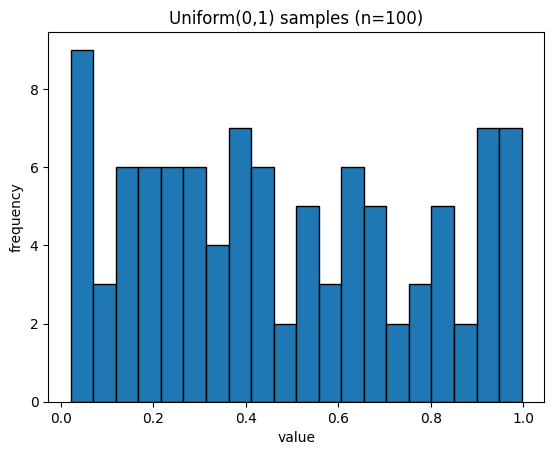

min = 0.021411524737734222
max = 0.9961014267589773
mean = 0.4817128408546165
std dev (sample) = 0.30073189877061973


In [ ]:
# --- Setup cell ----------------------------------------------------
# We import the libraries we'll use in the whole lab.
# Run this ONCE at the start of the notebook.
# -------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng()

stoch = rng.uniform(0, 1, size=100)

plt.hist(stoch, bins=20, edgecolor='black')
plt.xlabel('value')
plt.ylabel('frequency')
plt.title('Uniform(0,1) samples (n=100)')
plt.show()

print('min =', np.min(stoch))
print('max =', np.max(stoch))
print('mean =', np.mean(stoch))
print('std dev (sample) =', np.std(stoch, ddof=1))


### 3.2 Discrete random variables via Uniform(0,1)

**Biased coin:**  
Let
- 1 = head, with probability 0.6  
- 0 = tail, with probability 0.4.

Algorithm:
```python
u = rng.uniform(size=100)
y = (u > 0.4).astype(int)
```

Now:
1. Compute relative frequencies of 0 and 1.  
2. Plot the relative frequencies.  
3. Repeat with 1000 samples.

**Question:**  
- Why aren't the frequencies exactly 0.4 and 0.6 for n=100?  
- What changes for n=1000?


Rel freq tail (0): 0.34
Rel freq head (1): 0.66


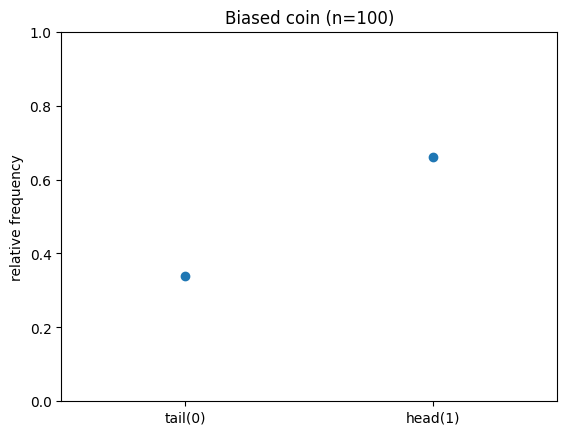

In [ ]:
u = rng.uniform(size=100)
y = (u > 0.4).astype(int)

p1 = np.mean(y == 1)
p0 = np.mean(y == 0)
print('Rel freq tail (0):', p0)
print('Rel freq head (1):', p1)

plt.plot([0,1],[p0,p1],'o')
plt.ylim(0,1)
plt.xlim(-0.5,1.5)
plt.xticks([0,1],['tail(0)','head(1)'])
plt.ylabel('relative frequency')
plt.title('Biased coin (n=100)')
plt.show()


Rel freq tail (0): 0.392
Rel freq head (1): 0.608


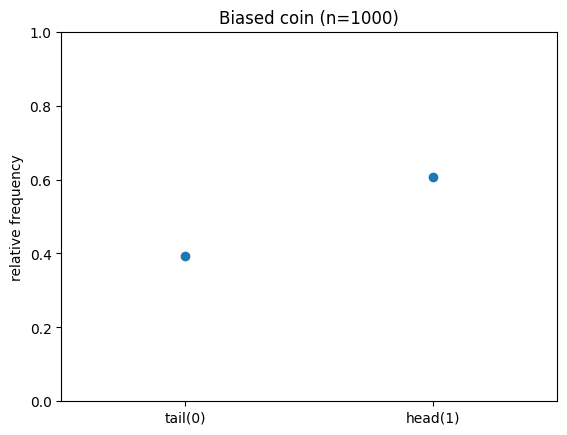

In [ ]:
u = rng.uniform(size=1000)
y = (u > 0.4).astype(int)

p1 = np.mean(y == 1)
p0 = np.mean(y == 0)
print('Rel freq tail (0):', p0)
print('Rel freq head (1):', p1)

plt.plot([0,1],[p0,p1],'o')
plt.ylim(0,1)
plt.xlim(-0.5,1.5)
plt.xticks([0,1],['tail(0)','head(1)'])
plt.ylabel('relative frequency')
plt.title('Biased coin (n=1000)')
plt.show()

1. Why arent the frequencies exactly 0.4 and 0.6 for n= 100?

- When we simulate 100 random samples from a Uniform distribution(0,1) and classify them as
   * 1 (head) if u > 0.4 and
   * 0 (tail) if u ≤ 0.4
Then the true probabilities are P(head) = 0.6 and P(tail) = 0.4. However, because we are only generating a finite number of random values (n = 100), we are observing a sample — not the entire population. Random variation causes the sample proportions to fluctuate around the true probabilities.This is an example of sampling error, and it’s completely expected when working with random samples of limited size.
2. What changes for n = 1000?
When we increase the number of samples from 100 to 1000, the law of large numbers comes into play.This law states that as the number of independent trials increases, the sample frequencies converge to the true pr**obabilities.

With n = 1000, random fluctuations still occur but they are smaller because the larger sample “averages out” more of the randomness.So with more samples, the random variation (sampling error) decreases, and the frequencies approach the true probabilities of 0.4 and 0.6.




**Fair die (1–6 uniform):**

Conceptually: cut [0,1] into 6 equal pieces.

In practice NumPy can do:



In [ ]:
rolls = rng.integers(low=1, high=7, size=20)
print(rolls)

[2 4 6 5 1 5 3 5 4 1 6 5 1 3 1 5 4 4 4 2]


### 3.3 Continuous distributions via inverse CDF

**Exponential(1)** with CDF $F(x)=1-e^{-x}$ for x ≥ 0.  
If U ~ Uniform(0,1), then X = -log(U) ~ Exponential(1).

Generate 100 samples and plot histogram:


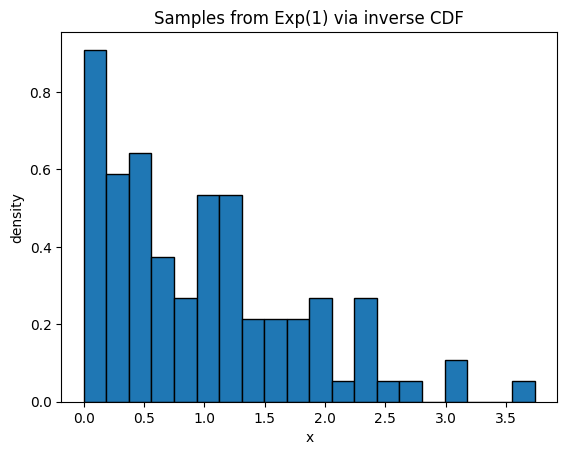

In [ ]:
# Visualization step:
# We draw a histogram to approximate the distribution of a random variable.
# Taller bars = values that appear more often in our simulation.
u = rng.uniform(size=100)
exp_samples = -np.log(u)

plt.hist(exp_samples, bins=20, edgecolor='black', density=True)
plt.xlabel('x')
plt.ylabel('density')
plt.title('Samples from Exp(1) via inverse CDF')
plt.show()


**Normal (Gaussian) directly by NumPy function**

NumPy has `rng.normal(loc=mu, scale=sigma, size=n)`.

1. Draw 200 samples from N(1,2) (mean 1, variance 2). Plot histogram.  
2. Draw 100 samples from N(0,1), N(0,2), N(0,3). Compare.

**Questions:**
- Do histograms look bell-shaped?  
- How does changing variance affect the spread?


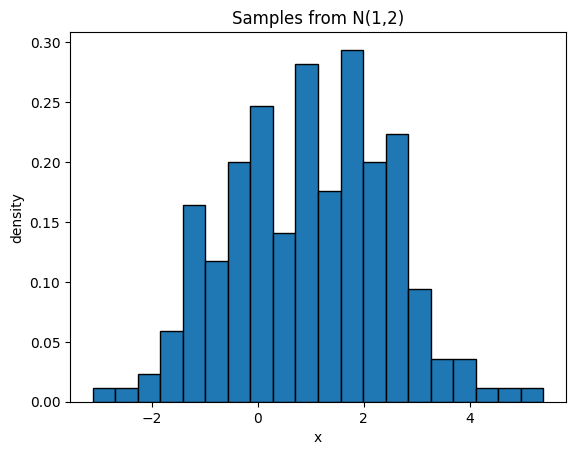

In [ ]:
normal_samples = rng.normal(loc=1, scale=np.sqrt(2), size=200)

plt.hist(normal_samples, bins=20, edgecolor='black', density=True)
plt.xlabel('x')
plt.ylabel('density')
plt.title('Samples from N(1,2)')
plt.show()

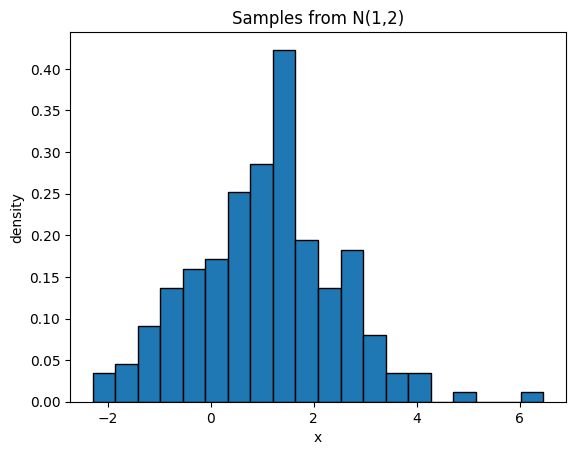

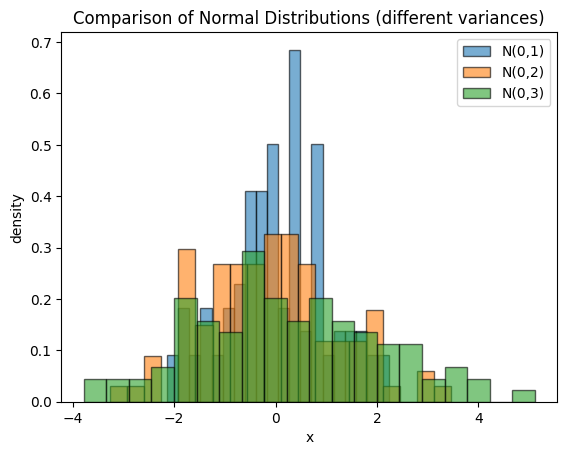

In [ ]:
normal_samples = rng.normal(loc=1, scale=np.sqrt(2), size=200)

plt.hist(normal_samples, bins=20, edgecolor='black', density=True)
plt.xlabel('x')
plt.ylabel('density')
plt.title('Samples from N(1,2)')
plt.show()

# Different normal distributions with same mean but different variance
n = 100

# mean = 0, variance = 1
x1 = rng.normal(loc=0, scale=np.sqrt(1), size=n)
# mean = 0, variance = 2
x2 = rng.normal(loc=0, scale=np.sqrt(2), size=n)
# mean = 0, variance = 3
x3 = rng.normal(loc=0, scale=np.sqrt(3), size=n)

plt.hist(x1, bins=20, density=True, alpha=0.6, edgecolor='black', label='N(0,1)')
plt.hist(x2, bins=20, density=True, alpha=0.6, edgecolor='black', label='N(0,2)')
plt.hist(x3, bins=20, density=True, alpha=0.6, edgecolor='black', label='N(0,3)')
plt.xlabel('x')
plt.ylabel('density')
plt.title('Comparison of Normal Distributions (different variances)')
plt.legend()
plt.show()

1. Do histograms look bell-shaped?

Yes, I think that the histograms are approximately bell-shaped andncentered around the mean. Most values cluste near the center and fewer values in the tails.

2. How does changing variance affect the spread?

We know that increasing the variance makes the distribution wider and flatter, while decreasing the variance makes it narrower and taller. The mean on the other hand remains the same.


## Section 3.4 — Continuous Distributions via Inverse CDF: Cauchy Distribution

The **Cauchy distribution** (also called the **Lorentz distribution**) is a heavy-tailed continuous distribution defined by the CDF  
$$
F(x) = \frac{1}{\pi} \arctan\!\left(\frac{x - x_0}{\gamma}\right) + \frac{1}{2},
$$
where $x_0$ is the **location** and $\gamma > 0$ is the **scale** parameter.

We can generate a Cauchy random variable $X$ from $U \sim \text{Uniform}(0,1)$ using the inverse CDF (quantile) method:  
$$
X = x_0 + \gamma \tan[\pi(U - 1/2)].
$$

Question: Complete the following code.

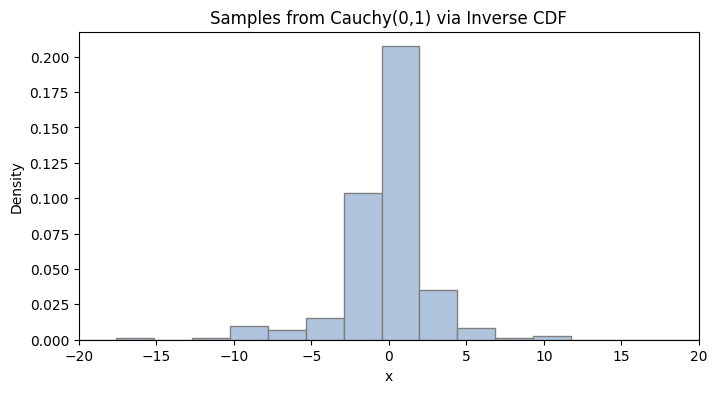

In [ ]:
# Parameters
n = 300
x0 = 0       # location
gamma = 1    # scale

# Generate Uniform(0,1)
U = np.random.rand(n)

# Inverse CDF transform for Cauchy
X = x0 + gamma * np.tan(np.pi * (U - 0.5))

# Plot histogram
plt.figure(figsize=(8,4))
plt.hist(X, bins=200, density=True, color='lightsteelblue', edgecolor='gray')
plt.title("Samples from Cauchy(0,1) via Inverse CDF")
plt.xlabel("x")
plt.ylabel("Density")
plt.xlim(-20, 20)
plt.show()


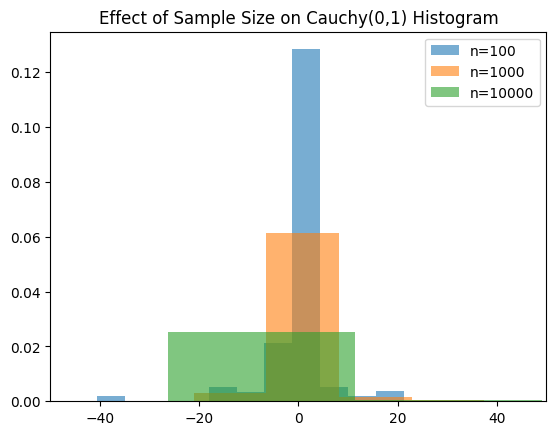

In [ ]:

# Compare different sample sizes
for m in [100, 1000, 10000]:
    X = x0 + gamma * np.tan(np.pi * (np.random.rand(m) - 0.5))
    plt.hist(X, bins=100, density=True, alpha=0.6, label=f"n={m}")
plt.legend()
plt.title("Effect of Sample Size on Cauchy(0,1) Histogram")
plt.xlim(-50, 50)
plt.show()

### Questions

1. Why does the Cauchy distribution look very different from the Normal and Exponential histograms?  
2. Does the sample mean of Cauchy samples seem to stabilize as \(n\) increases? Try:
   ```python
   means = [np.mean(x0 + gamma * np.tan(np.pi * (np.random.rand(k) - 0.5))) for k in [10,100,1000,10000]]
   print(means)
   ```
3. Explain why the Law of Large Numbers fails for the Cauchy distribution.

In [ ]:
means = [np.mean(x0 + gamma * np.tan(np.pi * (np.random.rand(k) - 0.5))) for k in [10,100,1000,10000]]
print(means)

[np.float64(0.23460148163033984), np.float64(0.6251650901613125), np.float64(0.15949786433638963), np.float64(0.9506832563672144)]


1. Why does the Cauchy distribution look very different from the Normal and Exponential histograms?

The Cauchy has very heavy tails.Normal and Exponential distributions mostly produce values near the center, and outliers values are rare.However,the Cauchy distribution produces extreme values much more often.So the Cauchy histogram looks short and wide with some bars far away, while the Normal one looks tall and centered.

2. Does the sample mean of Cauchy samples seem to stabilize as (n) increases? Try:

In [ ]:
means = [np.mean(x0 + gamma * np.tan(np.pi * (np.random.rand(k) - 0.5))) for k in [10,100,1000,10000]]
print(means)

[np.float64(-2.6347251963668343), np.float64(0.24076688055711631), np.float64(-2.4934215197440412), np.float64(0.5670640870385714)]


After we ran the means, we got numbers that jump around a lot (like −2.6, 0.24, −2.49, 0.56 …). That’s not what should happen.Normally, the mean would start settling near the true mean.For Cauchy distribution, even when n gets large, a single extreme value can pull the mean way left or way right. So the sample mean keeps moving. In conclusion, the sample mean does not settle down for Cauchy. It keeps bouncing around even for large n.

3. Explain why the Law of Large Numbers fails for the Cauchy distribution?

The Law of Large Numbers needs the random variable to have a finite expected value (a real mean). Let's approach the examples above to help reach our conclusion:
	- Normal distribution has a mean so the Law of Large Number works
	- Exponential distribution has a mean so the Law of Large Number works
	- Cauchy distribution does NOT have a finite mean so the Law of Large Numbers doesn’t apply.
In conclusion, because the Cauchy has such heavy tails, its mean is undefined or infinite. The outliers keep ruining the average no matter how many samples you take.

## 4. Law of Large Numbers (LLN)

If $X_1,X_2,\dots$ are i.i.d. with mean $m$, then the running average
$$\bar X_n = \frac{1}{n}\sum_{i=1}^n X_i$$
tends to stay close to $m$ for large $n$.

### 4.1 Uniform(0,1)


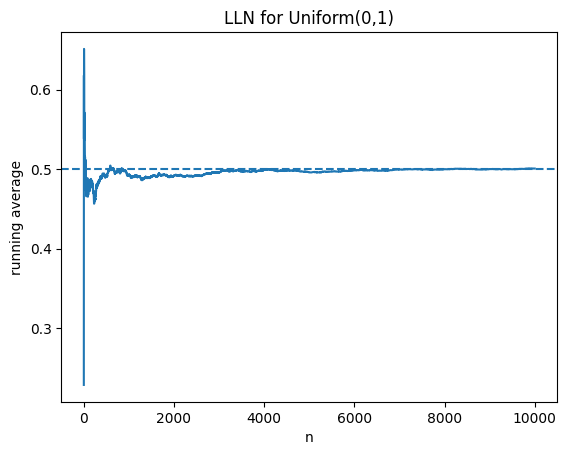

In [ ]:
# We simulate many i.i.d. samples and watch the running average.
# According to the Law of Large Numbers, this running average
# should stabilize near the true mean as n grows.
n = 10_000
x = rng.uniform(size=n)
running_avg = np.cumsum(x) / np.arange(1, n+1)

plt.plot(np.arange(1,n+1), running_avg)
plt.axhline(y=0.5, linestyle='--')  # true mean of Uniform(0,1)
plt.xlabel('n')
plt.ylabel('running average')
plt.title('LLN for Uniform(0,1)')
plt.show()




### Q1: What value does the curve approach?


### Q2: Compute E[X] for X ~ Uniform(0,1).


### Q3: Does the sample mean converges to the expected value?



1. What value does the curve approach?

 The curve approaches 0.5.

2. Compute E[X] for X ~ Uniform(0,1).

The expected value of a Uniform(0, 1) random variable is the midpoint of the interval:
E[X] = (0 + 1)/2} = 0.5
So E[X] = 0.5.

3. Does the sample mean converges to the expected value?
Yes, the sample mean converges to 0.5 which confirms the Law of Large Numbers.

### Background: Law of Large Numbers (LLN)

The **sample mean** of $n$ observations,
$$ \overline X_n = \frac{1}{n}\sum_{i=1}^n X_i, $$
is our running estimate of the *true* (population) mean $\mu = E[X]$.

The **Law of Large Numbers** says:  
- If $X_1, X_2, \dots$ are independent and identically distributed with finite mean $\mu$,  
- then $\overline X_n$ will get *closer and closer* to $\mu$ as $n$ gets large.

Important ideas for interpreting the plots you just generated:
- When $n$ is small, one unusual value (an outlier) can swing the running average a lot.
- As $n$ grows, each single new data point has less power to move the average.
- The running average tends to **stabilize** near the true mean, but it still wiggles — randomness never fully disappears.

Vocabulary:
- *Population mean* $\mu$: the true mean of the whole distribution.
- *Sample mean* $\overline X_n$: what we compute from our finite sample.
- *Convergence*: $\overline X_n$ "locks onto" $\mu$ in the long run.

Why this matters:
- This is why polling a *large* number of people gives a reliable estimate of public opinion.
- This is why Monte Carlo simulation works: averages of many random draws become trustworthy estimates.

Keep these ideas in mind for the questions below.



###  **Your Turn: Interpreting the LLN experiment**

1. When $n$ is small (first few points), does the running mean jump around a lot?  
2. As $n$ increases, does the running mean settle near the theoretical mean?  
3. Do you think it will *ever* become exactly equal to the true mean? Why or why not?

**Think About It:  **
Is randomness gone at large $n$, or just *averaged out*?


### 4.2 Normal(0,1) squares

Let $X_i \sim N(0,1)$ and define
$$Z_n = \frac{1}{n}\sum_{i=1}^n X_i^2.$$
We know $E[X^2]=1$.

We'll see $Z_n \to 1$.


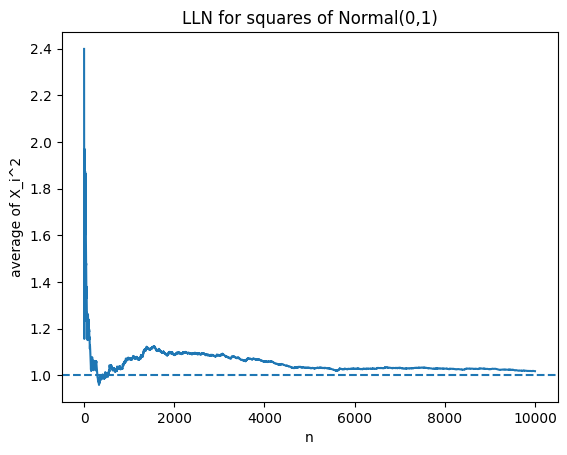

In [ ]:
n = 10_000
x = rng.normal(loc=0, scale=1, size=n)
running_avg_sq = np.cumsum(x**2) / np.arange(1, n+1)

plt.plot(np.arange(1,n+1), running_avg_sq)
plt.axhline(y=1.0, linestyle='--')
plt.xlabel('n')
plt.ylabel('average of X_i^2')
plt.title('LLN for squares of Normal(0,1)')
plt.show()




### Q1: What value does it approach? Calculate E[X^2].

### Q2: Why is this LLN?

### Q3: For which g can we approximate E[g(X)] by averaging g(X_i)?

1. What value does it approach? Calculate E[X^2]?
For normal distribution, we have E[X] = 0 and Var (X) = 1.
From the formula of Var(x), we Can find E[X^2].
E[X^2] = 1. So the curve approaches 1 becayse E[X^2] = 1 for X~N(0,1).

2. Why is this LLN?
It’s LLN because we are averaging i.i.d. variables with a finite mean (here the variables are X_i^2). So their average converges to their expectation.

3. For which g can we approximate E[g(X)] by averaging g(X_i)?
This is the general LLN idea. the condition is basically: g(X) must be integrable or have finite mean. We can approximate E[g(X)] by averaging g(X_i) for any function g such that E[|g(X)|] < \infty (i.e. g(X) has a finite expected value).

### 4.3 Biased coin LLN

Let $P(\text{head})=0.39$, encode head=1, tail=0, and look at running proportion of heads.


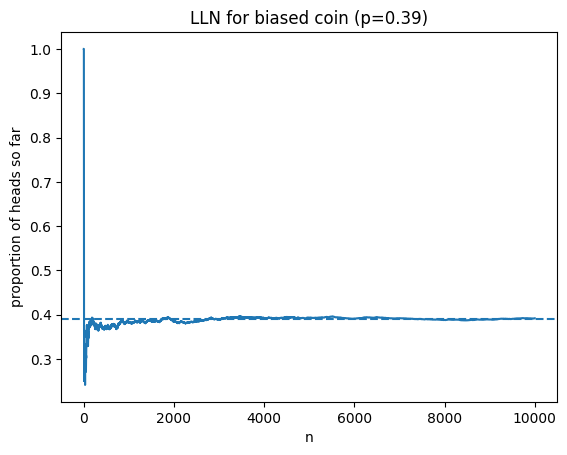

In [ ]:
n = 10_000
u = rng.uniform(size=n)
X = (u < 0.39).astype(int)

running_prop = np.cumsum(X) / np.arange(1, n+1)

plt.plot(np.arange(1,n+1), running_prop)
plt.axhline(y=0.39, linestyle='--')
plt.xlabel('n')
plt.ylabel('proportion of heads so far')
plt.title('LLN for biased coin (p=0.39)')
plt.show()




### Q1: Where does the plot stabilize? Compute E[X] for Bernoulli(0.39).
### Q2: How does LLN justify estimating P(A) ~ (# times A happens)/n ?

1. Where does the plot stabilize?

We Compute E[X] for Bernoulli(0.39).
For a Bernoulli(p) random variable,E[X] = p.
Here p = 0.39, so E[X] = 0.39.The plot stabilizes around 0.39

2. How does LLN justify estimating P(A) ~ (# times A happens)/n ?

LLN tells us that if we repeat an experiment many times, the observed proportion will get closer and closer to the true probability.We see that Bernoulli trials converges to their mean (the true probability), so the sample proportion (\# times A happens)/n is a valid estimator of P(A).

### 4.4 Monte Carlo integration

We approximate
$$ I = \int_0^1 e^{-x^2} dx = E[e^{-X^2}] $$
for $X \sim \text{Unif}(0,1)$.


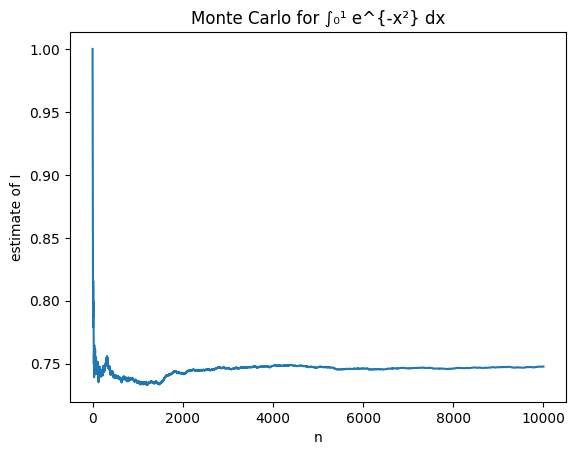

Final Monte Carlo estimate: 0.7477546415306642


In [ ]:
n = 10_000
x = rng.uniform(size=n)
vals = np.exp(-x**2)
running_I = np.cumsum(vals) / np.arange(1, n+1)

plt.plot(np.arange(1,n+1), running_I)
plt.xlabel('n')
plt.ylabel('estimate of I')
plt.title(r'Monte Carlo for ∫₀¹ e^{-x²} dx')
plt.show()

approx_I = running_I[-1]
print('Final Monte Carlo estimate:', approx_I)

# Q1: What value does it seem to settle near?
# Q2: Use LLN to explain why this works.


1. What value does it seem to settle near?

It seems to settle near 0.75 (more precisely about 0.747).

2. Use LLN to explain why this works.

Monte Carlo is approximate an integral by taking an average of the function evaluated at random points, and LLN guarantees that the average will get closer and closer to the true integral as we increase the number of samples. It works because the LLN says the sample average of e^(-X^2) converges to its expectation, and that expectation is exactly the integral that was shown above.

## 5. Central Limit Theorem (CLT)

**Goal:** understand what the *distribution of the sample mean* looks like.

Setup:
- Let $X_1, X_2, \dots, X_n$ be i.i.d. with mean $\mu$ and variance $\sigma^2$.
- Define the sample mean:
  $$\bar X_n = \frac{1}{n}\sum_{i=1}^n X_i.$$

The **Central Limit Theorem (CLT)** says that for large $n$,
$$
\frac{\bar X_n - \mu}{\sigma/\sqrt{n}}
\approx N(0,1),
$$
meaning the *standardized* sample mean is approximately Normal, even if the original $X_i$ are **not** Normal.

Why this is important:
- We can model averages (polling averages, quality control averages, etc.) using the Normal distribution.
- It lets us build approximate confidence intervals for $\mu$ without knowing the full population distribution.
- The accuracy of this Normal approximation improves as $n$ gets larger.

Key intuition:
- Each new sample adds randomness.
- But averaging $n$ samples divides that randomness by $\sqrt{n}$.
- So the mean becomes more predictable and its distribution becomes bell-shaped.




In [ ]:
# Skewed distribution: exponential or power-law-like heavy right tail
X = np.random.exponential(scale=1, size=(10_000, 5))
X.shape

(10000, 5)

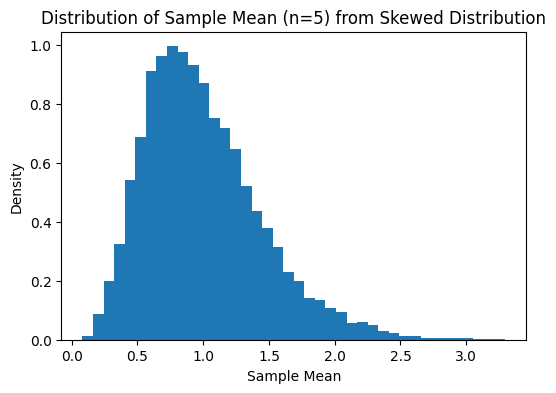

In [ ]:
# Sample means of 5
means = X.mean(axis=1)

plt.figure(figsize=(6,4))
plt.hist(means, bins=40, density=True)
plt.title("Distribution of Sample Mean (n=5) from Skewed Distribution")
plt.xlabel("Sample Mean")
plt.ylabel("Density")
plt.show()

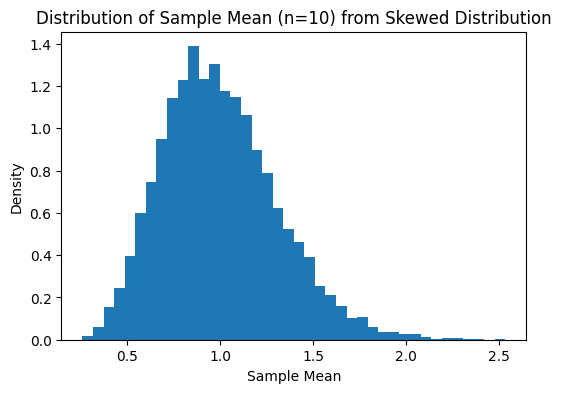

In [ ]:

# Skewed distribution: exponential or power-law-like heavy right tail
X = np.random.exponential(scale=1, size=(10_000, 10))

# Sample means of 10
means = X.mean(axis=1)

plt.figure(figsize=(6,4))
plt.hist(means, bins=40, density=True)
plt.title("Distribution of Sample Mean (n=10) from Skewed Distribution")
plt.xlabel("Sample Mean")
plt.ylabel("Density")
plt.show()

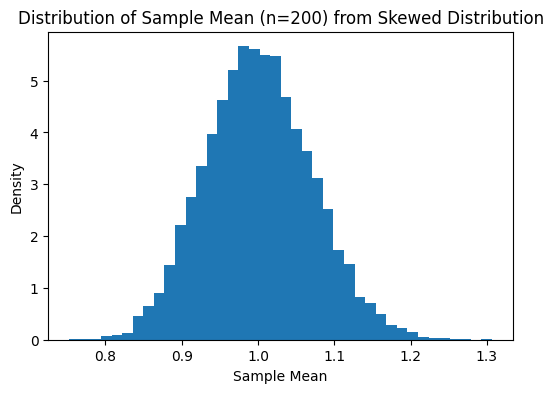

In [ ]:

# Skewed distribution: exponential or power-law-like heavy right tail
X = np.random.exponential(scale=1, size=(10_000, 200))

# Sample means of 200
means = X.mean(axis=1)

plt.figure(figsize=(6,4))
plt.hist(means, bins=40, density=True)
plt.title("Distribution of Sample Mean (n=200) from Skewed Distribution")
plt.xlabel("Sample Mean")
plt.ylabel("Density")
plt.show()

###  **Your Turn (CLT intuition)**
1. Suppose $X$ is very skewed (for example, most values near 0 but occasionally very large).  
   Do you expect the *average of 200 such draws* to still look skewed, or more symmetric? Why?

2. When $n$ increases, what happens to the spread (standard deviation) of $\bar X_n$?  
   Hint: compare $\sigma$ vs. $\sigma/\sqrt{n}$.

3. In your own words, what is one practical reason data scientists care about the CLT?

1. Suppose  X  is very skewed (for example, most values near 0 but occasionally very large).Do you expect the average of 200 such draws to still look skewed, or more symmetric? Why?

Even though the original distribution of X is highly skewed, the average of 200 draws looks much more symmetric and approximately bell-shaped. This happens because of the Central Limit Theorem (CLT) — as we average more independent samples, the distribution of the sample mean becomes closer to a Normal distribution, regardless of the shape of the original data. In our simulation, when n = 200, the effect of extreme values is smoothed out, so the histogram of the sample mean is nearly symmetric.

2. When  n  increases, what happens to the spread (standard deviation) of  X¯n ?
Hint: compare  σ  vs.  σ/√n.

The spread gets smaller as n increases.
The original data has standard deviation σ, but the sample mean has standard deviation σ/√n. So when n goes up, √n also goes up, and σ/√n goes down. That means the sample mean becomes more concentrated around the true mean.

3. In your own words, what is one practical reason data scientists care about the CLT?

Data scientists care about the CLT because it lets them trust averages. Even if the data itself is messy or skewed, the mean behaves predictably. So CLT turns randomness into something we can reason with and lets us use the Normal distribution to make conclusions about averages even when the original data isn’t Normal.

End of Lab 1
Raissa Kitenge
MATH5010